### Načteme data

In [1]:
import numpy as np
import os

PATH = os.path.join("datasets", "07", "imdb")

In [2]:
import pandas as pd

def load_data(file, path=PATH):
    csv = os.path.join(path, file)
    return pd.read_csv(csv)

In [3]:
data = load_data("IMDB Dataset.csv")

### Prozkoumáme a předpřipravíme data

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data["label"] = (data["sentiment"] == "positive").astype(int)
data = data.rename(columns={"review":"text"})

In [7]:
data.head()

,text,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


### Rozdělíme dataset na trénovací, testovací a validační

In [5]:
from sklearn.model_selection import train_test_split
train_full, test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
train, valid = train_test_split(train_full, test_size=0.2, random_state=42)

In [7]:
train.shape

(32000, 3)

In [11]:
valid.shape

(8000, 3)

In [12]:
test.shape

(10000, 3)

### Převod textu na vektor

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Hack pro GPU na Windows
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

Tokenizer převede slova na celočíselné indexy

In [9]:
num_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words)
tokenizer.fit_on_texts(train["text"])

In [10]:
X_train = tokenizer.texts_to_sequences(train["text"])
X_valid = tokenizer.texts_to_sequences(valid["text"])
X_test = tokenizer.texts_to_sequences(test["text"])

In [12]:
train.iloc[0,0]

"With no fault to the actors (they all put on great performances), the overall story was not very well executed. The movie opens with a great zinger: a crazy old guy forces a young Aborigine girl's car off the road. But then, we're forced to endure 40 minutes of character development with an entirely new group of characters ... and we don't know why until the 40 minutes are up. It turns out that they are the ones who eventually discover the girl's body ... and the story progresses from there.<br /><br />While the story does pick up at that point, it really goes nowhere. After 2 hours, I asked myself: was there a point to this, or was it just to see the characters struggle with accusations of racism and stupidity of how they handled the discovery? The story was ultimately unsatisfying and felt unfinished. While it is well acted, there's not a strong enough backbone in the film to warrant recommending it."

In [13]:
X_train[0]

[17,
 54,
 2171,
 5,
 1,
 149,
 33,
 29,
 264,
 20,
 77,
 366,
 1,
 437,
 62,
 13,
 21,
 51,
 70,
 2207,
 1,
 16,
 2101,
 17,
 3,
 77,
 3,
 1004,
 156,
 222,
 1918,
 3,
 192,
 4131,
 526,
 123,
 1,
 1207,
 18,
 91,
 1041,
 885,
 5,
 4708,
 1904,
 227,
 4,
 108,
 958,
 17,
 32,
 1079,
 168,
 544,
 4,
 102,
 2,
 71,
 89,
 118,
 135,
 363,
 1,
 1904,
 227,
 23,
 53,
 9,
 519,
 42,
 12,
 33,
 23,
 1,
 680,
 36,
 874,
 1827,
 1,
 4131,
 660,
 2,
 1,
 62,
 4331,
 34,
 46,
 7,
 7,
 136,
 1,
 62,
 124,
 1230,
 53,
 30,
 12,
 215,
 9,
 63,
 272,
 1285,
 100,
 228,
 620,
 10,
 1711,
 543,
 13,
 46,
 3,
 215,
 5,
 11,
 38,
 13,
 9,
 39,
 5,
 64,
 1,
 102,
 1650,
 17,
 4,
 2706,
 2,
 2722,
 4,
 86,
 33,
 2365,
 1,
 3415,
 1,
 62,
 13,
 1159,
 6983,
 2,
 443,
 7373,
 136,
 9,
 6,
 70,
 889,
 224,
 21,
 3,
 565,
 190,
 8,
 1,
 19,
 5,
 7062,
 9]

In [14]:
tokenizer.sequences_to_texts([X_train[0]])

["with no fault to the actors they all put on great performances the overall story was not very well executed the movie opens with a great a crazy old guy forces a young girl's car off the road but then we're forced to endure 40 minutes of character development with an entirely new group of characters and we don't know why until the 40 minutes are up it turns out that they are the ones who eventually discover the girl's body and the story progresses from there br br while the story does pick up at that point it really goes nowhere after 2 hours i asked myself was there a point to this or was it just to see the characters struggle with of racism and stupidity of how they handled the discovery the story was ultimately unsatisfying and felt unfinished while it is well acted there's not a strong enough in the film to warrant it"]

Nyní musíme sekvence zarovnat na stejnou délku. Defaultně je padding i truncating 'pre'

In [11]:
maxlen = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, padding='post', truncating='post', maxlen=maxlen)
X_valid = keras.preprocessing.sequence.pad_sequences(X_valid, padding='post', truncating='post', maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, padding='post', truncating='post', maxlen=maxlen)

In [9]:
y_train = train["label"]
y_valid = valid["label"]
y_test = test["label"]

In [17]:
X_train.shape

(32000, 500)

### SimpleRNN

In [28]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 32, input_length=maxlen, mask_zero=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid'),  
])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [33]:
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/5
250/250 [==============================] - 154s 615ms/step - loss: 0.6098 - accuracy: 0.6646 - val_loss: 0.4078 - val_accuracy: 0.8353
Epoch 2/5
250/250 [==============================] - 153s 613ms/step - loss: 0.3589 - accuracy: 0.8541 - val_loss: 0.3462 - val_accuracy: 0.8629
Epoch 3/5
250/250 [==============================] - 155s 619ms/step - loss: 0.2701 - accuracy: 0.8956 - val_loss: 0.4301 - val_accuracy: 0.8497
Epoch 4/5
250/250 [==============================] - 154s 617ms/step - loss: 0.2181 - accuracy: 0.9175 - val_loss: 0.3680 - val_accuracy: 0.8673
Epoch 5/5
250/250 [==============================] - 155s 621ms/step - loss: 0.1698 - accuracy: 0.9377 - val_loss: 0.3773 - val_accuracy: 0.8494


### Zobrazíme křivky 

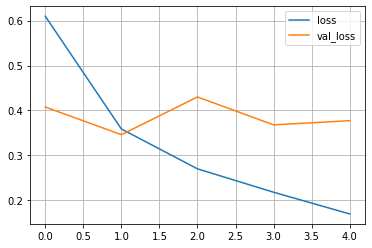

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

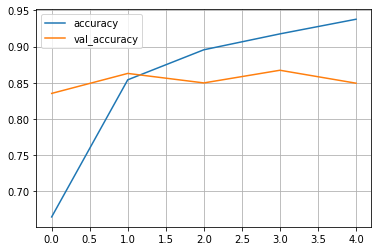

In [35]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

### Vyzkoušíme na testovacích datech

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 23s 74ms/step - loss: 0.3805 - accuracy: 0.8396: 1 - ETA: 0s - loss: 0.3811 - accura


[0.380497008562088, 0.8396000266075134]

SimpleRNN není dobrá ve zpracovávání dlouhých sekvencí, proto horší výsledek než doposud ukázané modely.


Pokračování viz prezentace

### LSTM

In [21]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid'),  
])

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/5
1000/1000 [==============================] - 33s 30ms/step - loss: 0.4890 - accuracy: 0.7689 - val_loss: 0.2891 - val_accuracy: 0.8866
Epoch 2/5
1000/1000 [==============================] - 29s 29ms/step - loss: 0.2860 - accuracy: 0.8888 - val_loss: 0.2630 - val_accuracy: 0.8936
Epoch 3/5
1000/1000 [==============================] - 30s 30ms/step - loss: 0.2301 - accuracy: 0.9150 - val_loss: 0.2622 - val_accuracy: 0.9026
Epoch 4/5
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1939 - accuracy: 0.9289 - val_loss: 0.2519 - val_accuracy: 0.9009
Epoch 5/5
1000/1000 [==============================] - 29s 29ms/step - loss: 0.1752 - accuracy: 0.9385 - val_loss: 0.2657 - val_accuracy: 0.9047


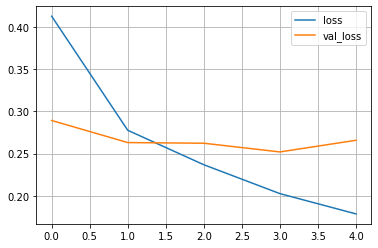

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

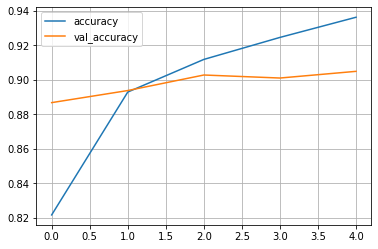

In [26]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2543 - accuracy: 0.9098


[0.25433316826820374, 0.9097999930381775]

**Zkusíme model ještě rozšířit**

In [29]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),  
])

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 56s 51ms/step - loss: 0.5869 - accuracy: 0.6750 - val_loss: 0.3269 - val_accuracy: 0.8767
Epoch 2/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.2934 - accuracy: 0.8863 - val_loss: 0.3979 - val_accuracy: 0.8556
Epoch 3/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.2453 - accuracy: 0.9088 - val_loss: 0.2635 - val_accuracy: 0.8986
Epoch 4/10
1000/1000 [==============================] - 48s 48ms/step - loss: 0.2072 - accuracy: 0.9262 - val_loss: 0.2831 - val_accuracy: 0.8994
Epoch 5/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.2114 - accuracy: 0.9208 - val_loss: 0.2524 - val_accuracy: 0.9035
Epoch 6/10
1000/1000 [==============================] - 50s 50ms/step - loss: 0.1591 - accuracy: 0.9450 - val_loss: 0.2885 - val_accuracy: 0.9020
Epoch 7/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.1429 - accuracy: 0.9516 - val_loss: 0.2949 -

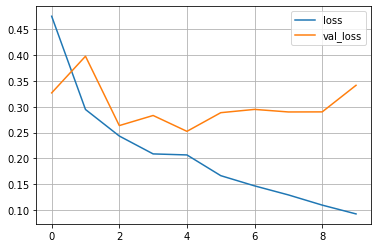

In [32]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

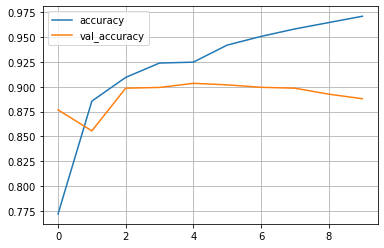

In [33]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 18ms/step - loss: 0.2417 - accuracy: 0.9042


[0.24173666536808014, 0.90420001745224]

Vyzkoušíme další úpravy modelu

In [54]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128, return_sequences=True),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid'),  
])

In [55]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
lstm_20 (LSTM)               (None, 500, 128)          131584    
_________________________________________________________________
lstm_21 (LSTM)               (None, 500, 128)          131584    
_________________________________________________________________
dense_20 (Dense)             (None, 500, 128)          16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 500, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [56]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 58s 53ms/step - loss: 0.4832 - accuracy: 0.7699 - val_loss: 0.2600 - val_accuracy: 0.8969
Epoch 2/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.2311 - accuracy: 0.9112 - val_loss: 0.2413 - val_accuracy: 0.9032
Epoch 3/10
1000/1000 [==============================] - 52s 52ms/step - loss: 0.1935 - accuracy: 0.9270 - val_loss: 0.2499 - val_accuracy: 0.9040
Epoch 4/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.1586 - accuracy: 0.9437 - val_loss: 0.2623 - val_accuracy: 0.9045
Epoch 5/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.1272 - accuracy: 0.9549 - val_loss: 0.3049 - val_accuracy: 0.9019
Epoch 6/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0945 - accuracy: 0.9685 - val_loss: 0.2890 - val_accuracy: 0.9021
Epoch 7/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.3217 -

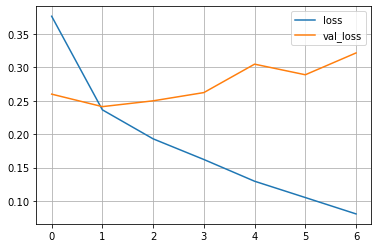

In [59]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

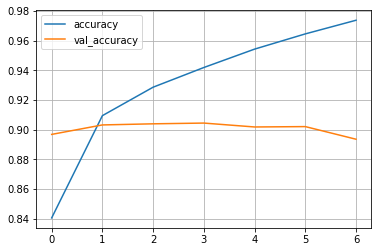

In [60]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 19ms/step - loss: 0.2376 - accuracy: 0.9064


[0.23759961128234863, 0.9064000248908997]

### GRU

In [62]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.GRU(128, return_sequences=True),
    layers.GRU(128),
    layers.Dense(1, activation="sigmoid"),
])

In [63]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 52s 47ms/step - loss: 0.4898 - accuracy: 0.7543 - val_loss: 0.3413 - val_accuracy: 0.8521
Epoch 2/10
1000/1000 [==============================] - 46s 46ms/step - loss: 0.2445 - accuracy: 0.9036 - val_loss: 0.2287 - val_accuracy: 0.9093
Epoch 3/10
1000/1000 [==============================] - 45s 45ms/step - loss: 0.1867 - accuracy: 0.9289 - val_loss: 0.2372 - val_accuracy: 0.9086
Epoch 4/10
1000/1000 [==============================] - 45s 45ms/step - loss: 0.1472 - accuracy: 0.9481 - val_loss: 0.2291 - val_accuracy: 0.9126
Epoch 5/10
1000/1000 [==============================] - 45s 45ms/step - loss: 0.1210 - accuracy: 0.9571 - val_loss: 0.2363 - val_accuracy: 0.9068
Epoch 6/10
1000/1000 [==============================] - 45s 45ms/step - loss: 0.1010 - accuracy: 0.9660 - val_loss: 0.2870 - val_accuracy: 0.9050
Epoch 7/10
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0808 - accuracy: 0.9723 - val_loss: 0.3569 -

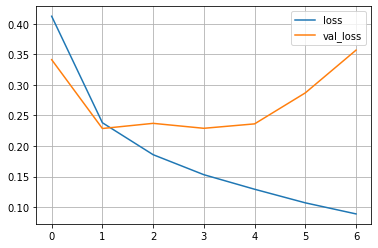

In [68]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

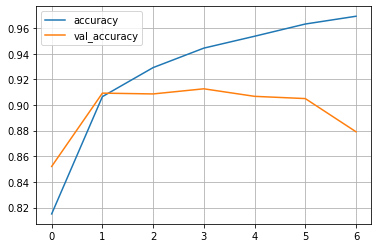

In [69]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

In [70]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.2200 - accuracy: 0.9127 1s - loss: 0.2167 - accura


[0.2199741005897522, 0.9126999974250793]

Rekurentní neuronové sítě jsou vhodné zejména na analýzu globální, dlouhodobé struktury dat. To není zase natolik užitečné v případě analýzy sentimentu, kde i přístup založený na BoW s dense vrstvami dokáže fungovat velmi dobře a za mnohem menších výpočetních nároků. Výhoda LSTM a GRU se ukáže zejména v případě složitějších úloh jako je např. strojový překlad nebo analýzy časových řad.

**Ještě vyzkoušíme pár modelů**

Obousměrné RNN - viz prezentace.

In [75]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

In [76]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 57s 52ms/step - loss: 0.5125 - accuracy: 0.7404 - val_loss: 0.3143 - val_accuracy: 0.8749
Epoch 2/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.2639 - accuracy: 0.9050 - val_loss: 0.2491 - val_accuracy: 0.9010
Epoch 3/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.2005 - accuracy: 0.9324 - val_loss: 0.2383 - val_accuracy: 0.9028
Epoch 4/10
1000/1000 [==============================] - 50s 50ms/step - loss: 0.1719 - accuracy: 0.9466 - val_loss: 0.2283 - val_accuracy: 0.9134
Epoch 5/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.1388 - accuracy: 0.9572 - val_loss: 0.2371 - val_accuracy: 0.9096
Epoch 6/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.1165 - accuracy: 0.9658 - val_loss: 0.2957 - val_accuracy: 0.9041
Epoch 7/10
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0889 - accuracy: 0.9750 - val_loss: 0.3489 -

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 18ms/step - loss: 0.2324 - accuracy: 0.9052


[0.23240844905376434, 0.9052000045776367]

**A poslední model**

In [79]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.05),
    layers.Dense(1, activation="sigmoid"),
])

In [80]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [81]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 48s 43ms/step - loss: 0.4584 - accuracy: 0.7738 - val_loss: 0.2511 - val_accuracy: 0.8976
Epoch 2/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.2233 - accuracy: 0.9153 - val_loss: 0.2398 - val_accuracy: 0.9032
Epoch 3/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1747 - accuracy: 0.9325 - val_loss: 0.2330 - val_accuracy: 0.9055
Epoch 4/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1423 - accuracy: 0.9505 - val_loss: 0.2326 - val_accuracy: 0.9101
Epoch 5/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1128 - accuracy: 0.9614 - val_loss: 0.2438 - val_accuracy: 0.9057
Epoch 6/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0901 - accuracy: 0.9696 - val_loss: 0.2990 - val_accuracy: 0.8941
Epoch 7/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0636 - accuracy: 0.9795 - val_loss: 0.3401 -

In [82]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 16ms/step - loss: 0.2350 - accuracy: 0.9072


[0.23500871658325195, 0.9071999788284302]

**Ještě zkusíme lépe předzpracovat data**

pip install nltk

In [88]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [10]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [11]:
train['processed'] = train['text'].apply(lambda x: clean_text(x))
valid['processed'] = valid['text'].apply(lambda x: clean_text(x))
test['processed'] = test['text'].apply(lambda x: clean_text(x))

<ipython-input-11-ce808204f63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['processed'] = train['text'].apply(lambda x: clean_text(x))
<ipython-input-11-ce808204f63d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['processed'] = valid['text'].apply(lambda x: clean_text(x))
<ipython-input-11-ce808204f63d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [13]:
train.head()

,text,sentiment,label,processed
11794,With no fault to the actors (they all put on g...,negative,0,fault actor put great performance overall stor...
24925,The first thing I thought when I saw this film...,positive,1,first thing think saw film wa really film leas...
28578,Post-feminist depiction of cruelty and sadism....,positive,1,postfeminist depiction cruelty sadismbr br spo...
13987,OMG this is one of the worst films iv ever see...,negative,0,omg one worst film iv ever see iv see lot im f...
7693,"The Box is a film with great potential, but th...",negative,0,box film great potential maker totally misuse ...


In [14]:
num_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words)
tokenizer.fit_on_texts(train["processed"])

In [15]:
X_train_prepr = tokenizer.texts_to_sequences(train["processed"])
X_valid_prepr = tokenizer.texts_to_sequences(valid["processed"])
X_test_prepr = tokenizer.texts_to_sequences(test["processed"])

In [16]:
maxlen = 500
X_train_prepr = keras.preprocessing.sequence.pad_sequences(X_train_prepr, padding='post', truncating='post', maxlen=maxlen)
X_valid_prepr = keras.preprocessing.sequence.pad_sequences(X_valid_prepr, padding='post', truncating='post', maxlen=maxlen)
X_test_prepr = keras.preprocessing.sequence.pad_sequences(X_test_prepr, padding='post', truncating='post', maxlen=maxlen)

In [26]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid"),
])

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train_prepr,
                    y_train,
                    epochs=5,
                    validation_data=(X_valid_prepr, y_valid),
                    callbacks=[early_stopping])

Epoch 1/5
1000/1000 [==============================] - 47s 42ms/step - loss: 0.4686 - accuracy: 0.7663 - val_loss: 0.2706 - val_accuracy: 0.8860
Epoch 2/5
1000/1000 [==============================] - 40s 40ms/step - loss: 0.2318 - accuracy: 0.9186 - val_loss: 0.2881 - val_accuracy: 0.8907
Epoch 3/5
1000/1000 [==============================] - 40s 40ms/step - loss: 0.1662 - accuracy: 0.9464 - val_loss: 0.3096 - val_accuracy: 0.8852
Epoch 4/5
1000/1000 [==============================] - 40s 40ms/step - loss: 0.1198 - accuracy: 0.9645 - val_loss: 0.3749 - val_accuracy: 0.8852
Epoch 5/5
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0768 - accuracy: 0.9778 - val_loss: 0.3843 - val_accuracy: 0.8816


In [29]:
model.evaluate(X_test_prepr, y_test)

313/313 [==============================] - 7s 16ms/step - loss: 0.3887 - accuracy: 0.8747


[0.3886549472808838, 0.8747000098228455]

Pokračování viz prezentace.